# Portfolio: ML with Sklearn
##### Author: Saugat Gyawali
##### Date: 10/31/2022

##### 1. Read the auto data

In [1]:
import pandas as pd
data = pd.read_csv("Auto.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


###### Dimension of dataframe

In [2]:
print('Dimension: ',data.shape)

Dimension:  (392, 9)


##### 2.Data Exploration with code

In [3]:
data[["mpg","weight","year"]].describe()

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


mpg ranges from 9 to 46.60 and average is 23.44, whereas weight ranges from 1613 to 5140 with average of 2977.58. Lastly, year ranges from 70 to 82 with average of 76. 

##### 3. Explore data types

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [5]:
data['cylinders'] = data['cylinders'].astype('category')
data['cylinders']=data['cylinders'].astype('category').cat.codes


In [6]:
data['origin'] = data['origin'].astype('category')

In [7]:
data.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

##### 4. Deal with NAs

In [8]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

In [9]:
data = data.dropna()
print('New dimension', data.shape)

New dimension (389, 9)


##### 5. Modify columns

In [10]:
average = data['mpg'].mean()
data.loc[data['mpg'] > average,'mpg_high']=1
data.loc[data['mpg'] <= average,'mpg_high']=0

In [11]:
data = data.drop(columns=['mpg','name'])

In [12]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0.0
1,4,350.0,165,3693,11.5,70.0,1,0.0
2,4,318.0,150,3436,11.0,70.0,1,0.0
3,4,304.0,150,3433,12.0,70.0,1,0.0
6,4,454.0,220,4354,9.0,70.0,1,0.0


##### Data exploration with graphs

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

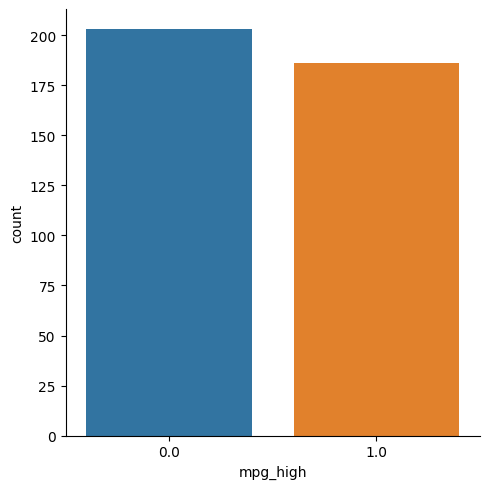

In [14]:
sns.catplot(x="mpg_high",kind="count", data=data)


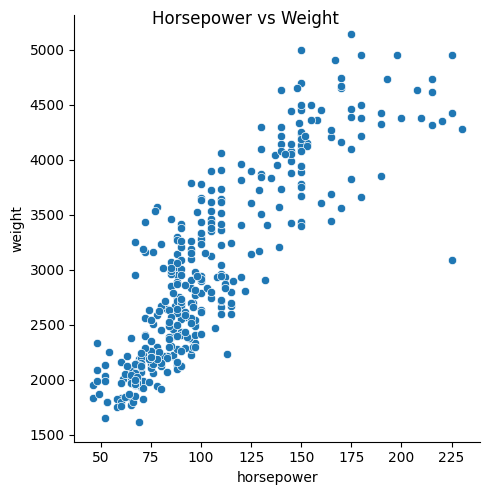

In [15]:
g = sns.relplot(data = data, x="horsepower", y="weight")
g.fig.suptitle('Horsepower vs Weight')
plt.show()


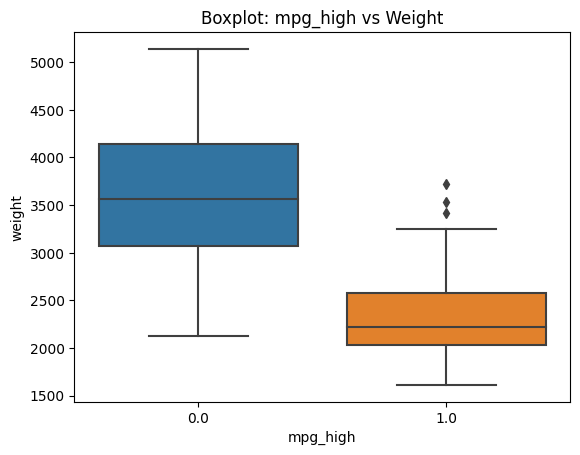

In [16]:
g = sns.boxplot(x="mpg_high", y="weight",data=data)
g.set(title='Boxplot: mpg_high vs Weight')
plt.show()

By analyzing the graphs, from the first catplot it is found that a mpg which is more than average is slightly lesser than a mpg which is less than average. It simply counts the number of 0's and 1's which has been categorized above.
From the second relplot graph, it is found that horsepower and weight is directly proportional meaning when horsepower is increased, weight is also incresed.
From the box plot, we found that a median weight of 0's(less than average) is almost 3500/ While minimum score is almorst 2100 and lower quartile is almost 3100. With almost 4200 as a upper quartile. For skewnesw, it is found to be normal distribution.
For 1's, median weight of 1's(more than average) is found in 2200(approx.). It is found to be slightly right skewed. There are some outliers for 1's which is because it lies outside the range of 

##### Train/test split

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X = data.iloc[:,0:7]

In [19]:
Y = data.iloc[:,7]

In [20]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1234)

In [21]:
print('train size: ', X_train.shape)
print('test size: ', X_test.shape)

train size:  (311, 7)
test size:  (78, 7)


##### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
clf.score(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9067524115755627

In [24]:
pred = clf.predict(X_test)

In [25]:
from  sklearn.metrics import classification_report

print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88        50
         1.0       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, pred)

array([[40, 10],
       [ 1, 27]], dtype=int64)

##### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [31]:
pred = clf.predict(X_test)

In [32]:
print('accuracy = ', accuracy_score(Y_test,pred))

accuracy =  0.8846153846153846


In [33]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91        50
         1.0       0.81      0.89      0.85        28

    accuracy                           0.88        78
   macro avg       0.87      0.89      0.88        78
weighted avg       0.89      0.88      0.89        78



In [34]:
confusion_matrix(Y_test,pred)

array([[44,  6],
       [ 3, 25]], dtype=int64)

In [35]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


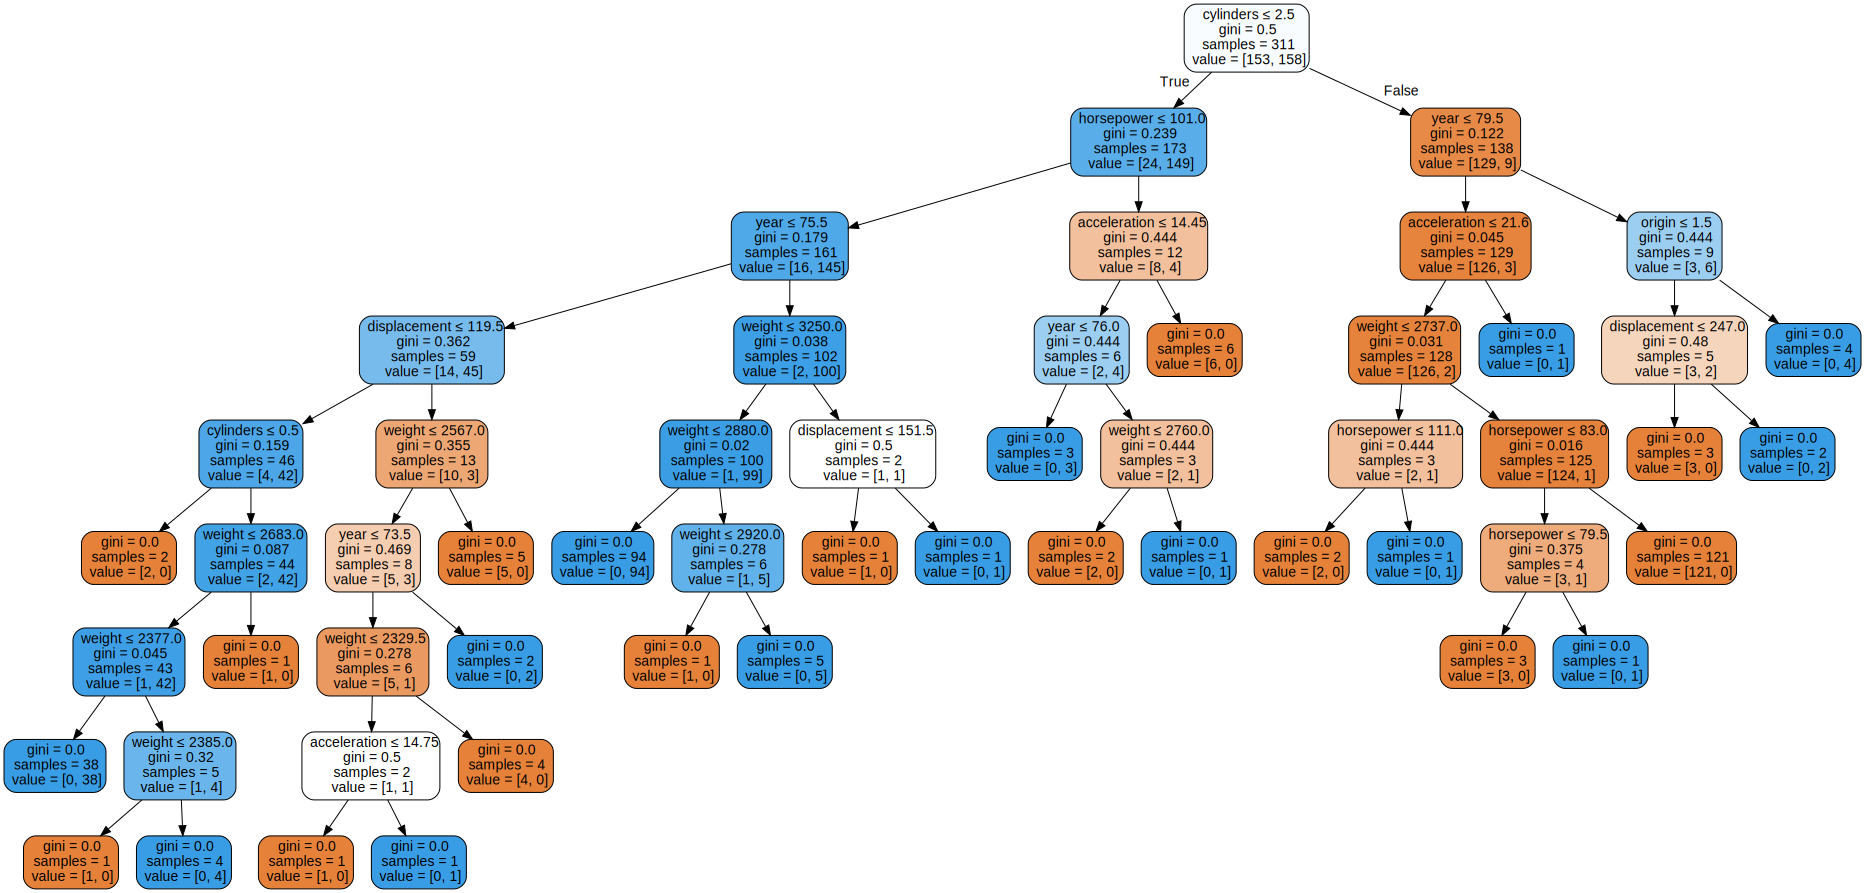

In [37]:
import graphviz
import sklearn

dot_data = sklearn.tree.export_graphviz(clf, feature_names=X.columns,    
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,)
graph = graphviz.Source(dot_data)
graph

##### Neural Network

In [38]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(3,), max_iter=1500, random_state = 1234)
clf.fit(X_train_scaled,Y_train)
pred = clf.predict(X_test_scaled)

In [40]:
print('accuracy = ', accuracy_score(Y_test,pred))
confusion_matrix(Y_test, pred)

accuracy =  0.8846153846153846


array([[43,  7],
       [ 2, 26]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        50
         1.0       0.79      0.93      0.85        28

    accuracy                           0.88        78
   macro avg       0.87      0.89      0.88        78
weighted avg       0.90      0.88      0.89        78



###### Using different settings

In [42]:
clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(3,), max_iter=1500, random_state = 1234)
clf.fit(X_train_scaled,Y_train)
pred = clf.predict(X_test_scaled)

In [43]:
print('accuracy = ', accuracy_score(Y_test,pred))
confusion_matrix(Y_test, pred)

accuracy =  0.8333333333333334


array([[40, 10],
       [ 3, 25]], dtype=int64)

In [44]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86        50
         1.0       0.71      0.89      0.79        28

    accuracy                           0.83        78
   macro avg       0.82      0.85      0.83        78
weighted avg       0.85      0.83      0.84        78



Comparing two models, using 'sgd' or Stochastic gradient descent got slightly less accuracy then using solver lbfgs. This might be because of less data sets because SGD computes, gradients using small subsets of the training data. Since, the training data is less. So, an accuracy using SGD was less. 
For 'lbfgs' or Limited memory BFGS uses the solutions and gradients from the itterations and calculate Hessian matrix. It also requires few hyperparameters to tune. It was better with small data sets.

##### Analysis

Which algorithm performed better?
Decision tree was found to be performing better based on precision and accuracy.

Compare accuracy, recall and precision metrics by class.
Precision is a ratio of true postives to the sum of true and false positives.
Recall is the ratio of true positives to the sum of true postives and false negatives. 
Accuracy determines whether it predicted correct result or not based on test value.

In logistic regression, 
Precison:Out of all the auto that the model predicted 73% was above the average. 
And, recall: for above average is 96% that means the model predicted the outcome correctly for those auto.
F1:Value is close to 1, so it does a good job of predicting. With accuracy of 86%.
Similarly, In decision tree,
Precision was found to be 0.85 for one who has mpg above average. This measns out of all the auto that the model predicted it was 85% above the average mpg.
Recall was found to be 0.82, this is a ratio of true positives to the sum of true positives and false negatives. Meaning, 82% was found to be correct predicted for above the average.
Accuracy was found to be 86%. This means the model predicted 86%.

In neutral network using lbfgs, accuracy was found to be 88% with precison of 79% for mpg above average. Recall for it was found to be 93% for 1's.

For sgd, accuracy was 83% with precision of 71% for 1's. Recall was 89% meaning it's ability to detect positive samples.

Better performing algorithm might have outperfomed the other because of the nature of the datasets. Since, the decision tree works for large dimensional data. The data may not be overfitting and decision boundaries may not be restricted to parallel to attribute.

R versus Sklearn.

I found using Sklearn easier than R. This might be because I was quite familiar with python too. But the major part was in a documentation. The documentation of sklearn was so clear and descriptive than R. But it is slightly less comprehensive than of R. Also, sklearn was found to be more understantable as compared to R. 